In [53]:
import glob
import pandas as pd
import numpy as np
import os

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [55]:
all_file= glob.glob("../songData/*.xlsx")
len(all_file)
all_file

['../songData/songType5.xlsx',
 '../songData/songType11.xlsx',
 '../songData/songType12.xlsx',
 '../songData/songType14.xlsx',
 '../songData/songType18.xlsx',
 '../songData/songType15.xlsx',
 '../songData/songType9.xlsx',
 '../songData/songType2.xlsx',
 '../songData/songType13.xlsx',
 '../songData/songType16.xlsx',
 '../songData/songType8.xlsx',
 '../songData/songType6.xlsx',
 '../songData/songType19.xlsx',
 '../songData/songType7.xlsx',
 '../songData/songType1.xlsx',
 '../songData/songType4.xlsx',
 '../songData/songType0.xlsx',
 '../songData/songType17.xlsx',
 '../songData/songType20.xlsx',
 '../songData/songType3.xlsx',
 '../songData/songType10.xlsx']

In [56]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    count.append(len(temp))
    names.append(each.split('/')[2][:-5])
    clusters.append(temp['songType'].iloc[0])
    data.append(temp)
names
data = pd.concat(data)

In [57]:

data = data.sample(frac = 1)
pd.DataFrame(data)
data['lyrics'].iloc[1]

'কেনরে চুমকি কথা কয় না হায়রে হায় বিজলী আর চমকায় না মুখে তে তালা মেরেছে বিজলীতে চুম্বক ধরেছে আগে দুই রানী পিছে রাজা জনি বাঘের খাঁচায় দুটো হরিণ নাচে রে বাঘ তা’ধীন তা’ধীন সুন্দর বনের সুন্দরী গো মনের বনে ঘর বাঁধো করো না কো জোড়াজুড়ি হার মানো তাড়াতাড়ি ফাঁদে পড়েছ ছাড়া পাবে না।। যতই রাগো মন্দ না প্রেমেরই হাল ছাড়বো না প্রেমের কাটা খোলা দায় যদি একবার লেগে যায় যত কর টানাটানি হবে আরো কানা কানি এসো করি ভাব কেউ জানবে না।।'

In [58]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [59]:
data['lyrics']= data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [60]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [61]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################
from sklearn.naive_bayes import MultinomialNB
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(#stop_words = stop_words,
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1,3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',MultinomialNB(alpha=0.001)),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=6, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
5

predicted = classifier.predict(X_test)

Cross Accuracy: 0.56 (+/- 0.04)


In [62]:
joblib.dump(classifier, '../Model/sample_model.pickle')

['../Model/sample_model.pickle']

In [63]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.56 (+/- 0.04)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      0.65      0.52       323
           2       0.00      0.00      0.00         4
           3       0.45      0.45      0.45       274
           4       0.33      0.33      0.33         3
           5       0.00      0.00      0.00        22
           6       0.68      0.45      0.55        33
           7       0.79      0.47      0.59        58
           8       0.00      0.00      0.00         5
           9       0.50      0.05      0.09        21
          10       0.25      0.06      0.09        18
          11       0.24      0.15      0.18        27
          12       0.15      0.08      0.10        39
          13       0.58      0.52      0.55       232
          14       0.33      0.23      0.27        13
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00      

/home/tuktuki/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

<AxesSubplot:>

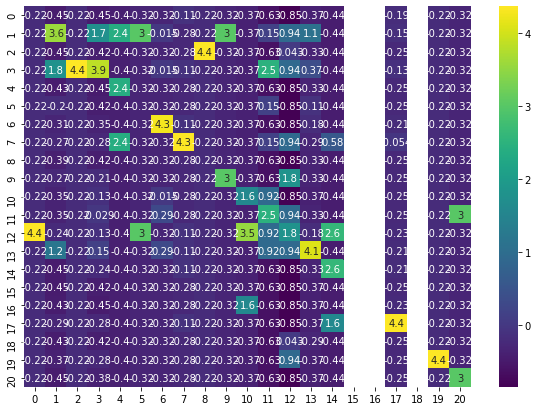

In [65]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array)
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (10,7))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')